In [1]:
import os
import shutil
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import numpy as np
import sklearn

In [2]:
sklearn.__version__

'0.24.1'

In [3]:
from platform import python_version

print(python_version())

3.8.8


# Config

In [4]:
directory = os.path.dirname(os.path.dirname(os.getcwd()))

result_dir = directory + '/aerosol_results/bimodal_dataset/inv_gnoise_0.05'

plot_dir = directory + '/aerosol_results/bimodal_dataset/inv_gnoise_0.05/plots'
if not os.path.exists(plot_dir):
    os.makedirs(plot_dir)

model_dir = directory + '/aerosol_results/bimodal_dataset/inv_gnoise_0.05/models'
if not os.path.exists(model_dir):
    os.makedirs(model_dir)

# Load data

In [5]:
df = pd.read_csv(f'{result_dir}/results.csv', index_col=0)


In [6]:
config_columns = [col for col in df.columns if col.startswith('config/')]
config_column_labels = {col: col.replace('config/', '') for col in config_columns if col != 'datafile'}

In [7]:
df.columns

Index(['MAE_train', 'MAE_val', 'MAPE_train', 'MAPE_val', 'MSE_train',
       'MSE_val', 'median_percentile_max_error_train',
       'median_percentile_max_error_val', '90_percentile_max_error_train',
       '90_percentile_max_error_val', 'r2_train', 'r2_val', 'r2_adj_train',
       'r2_adj_val', 'MAE_train_dvar', 'MAE_val_dvar', 'MAPE_train_dvar',
       'MAPE_val_dvar', 'MSE_train_dvar', 'MSE_val_dvar',
       'median_percentile_max_error_train_dvar',
       'median_percentile_max_error_val_dvar',
       '90_percentile_max_error_train_dvar',
       '90_percentile_max_error_val_dvar', 'r2_train_dvar', 'r2_val_dvar',
       'r2_adj_train_dvar', 'r2_adj_val_dvar', 'time_this_iter_s', 'done',
       'timesteps_total', 'episodes_total', 'training_iteration',
       'experiment_id', 'date', 'timestamp', 'time_total_s', 'pid', 'hostname',
       'node_ip', 'time_since_restore', 'timesteps_since_restore',
       'iterations_since_restore', 'trial_id',
       'config/activation_function_last_l

In [8]:
df['r2_val']

0     0.591837
1     0.581116
2     0.586143
3     0.576538
4     0.573277
5     0.580197
6     0.576724
7     0.582462
8     0.576940
9     0.578952
10    0.580040
11    0.593830
12    0.592811
13    0.587755
14    0.574178
15    0.581240
16    0.578517
17    0.577055
18    0.591661
19    0.569132
20    0.572821
21    0.574980
22    0.576839
23    0.577797
24    0.573400
Name: r2_val, dtype: float64

# Plot

## Generalisation of $R^2$

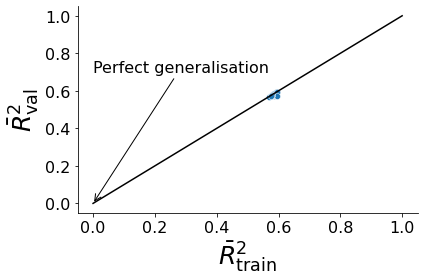

In [9]:
fig, ax = plt.subplots()

sns.scatterplot(data=df, x='r2_adj_train', y='r2_adj_val', ax=ax)
ax.plot([0, 1.], [0, 1.], color='black')
ax.annotate(xy=(0, 0),
            xytext=(0, 0.7),
            text='Perfect generalisation',
            fontsize=16,
            arrowprops={
                'arrowstyle': '->'
            })
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlabel(r'$\bar{R}^2_\mathrm{train}$', fontsize=25)
ax.set_ylabel(r'$\bar{R}^2_\mathrm{val}$', fontsize=25)
ax.tick_params(labelsize=16)

fig.tight_layout()
fig.savefig(f'{plot_dir}/R2_generalisation.jpg')

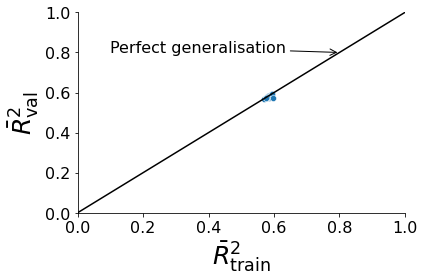

In [10]:
fig, ax = plt.subplots()

sns.scatterplot(data=df, x='r2_adj_train', y='r2_adj_val', ax=ax)
ax.plot([-1.5, 1.], [-1.5, 1.], color='black')
ax.annotate(xy=(0.8, 0.8),
            xytext=(0.1, 0.8),
            text='Perfect generalisation',
            fontsize=16,
            arrowprops={
                'arrowstyle': '->'
            })
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlabel(r'$\bar{R}^2_\mathrm{train}$', fontsize=25)
ax.set_ylabel(r'$\bar{R}^2_\mathrm{val}$', fontsize=25)
ax.tick_params(labelsize=16)
ax.set_xlim([0, 1.])
ax.set_ylim([0, 1.])

fig.tight_layout()
fig.savefig(f'{plot_dir}/R2_generalisation_closeup.jpg')

## Relationship between $R^2$ and rel. error

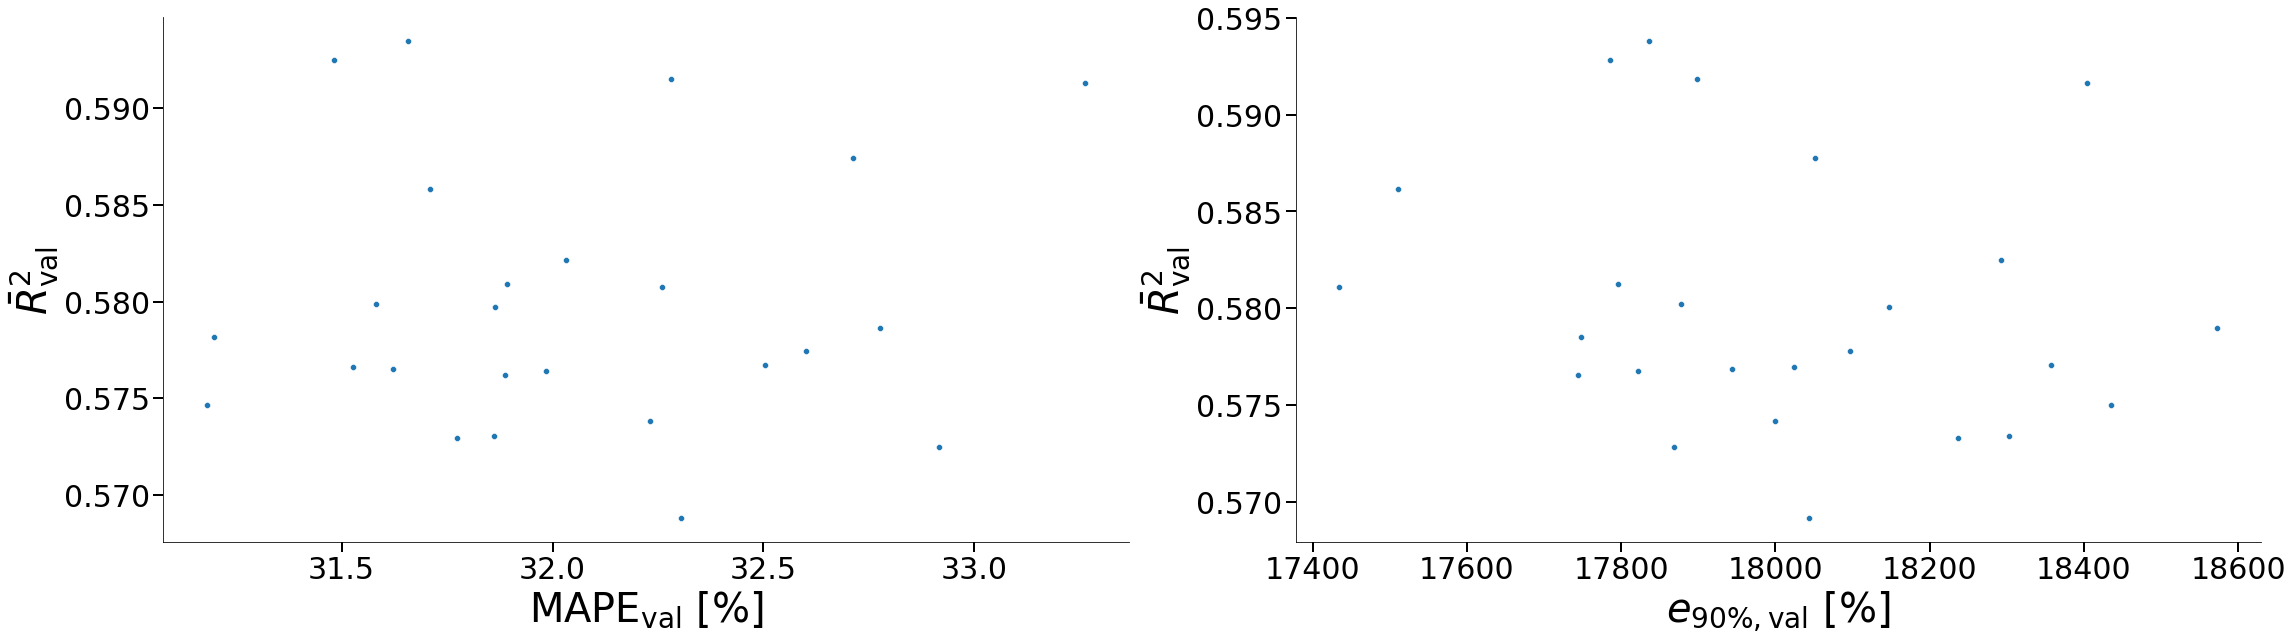

In [11]:
fig, axes = plt.subplots(1, 2, figsize=(32, 9))

ax = axes[0]
sns.scatterplot(data=df, x='MAPE_val', y='r2_adj_val', ax=ax)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlabel(r'$\mathrm{MAPE}_\mathrm{val}$ [%]', fontsize=40)
ax.set_ylabel(r'$\bar{R}^2_\mathrm{val}$', fontsize=40)

ax = axes[1]
sns.scatterplot(data=df, x='90_percentile_max_error_val', y='r2_val', ax=ax)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlabel(r'$e_\mathrm{90\%, val}$ [%]', fontsize=40)
ax.set_ylabel(r'$\bar{R}^2_\mathrm{val}$', fontsize=40)

for ax in axes:
    ax.tick_params(labelsize=30, width=2, length=10)

fig.tight_layout()
fig.savefig(f'{plot_dir}/R2_vs_rel_errors.jpg')

## Execution time vs. batch size

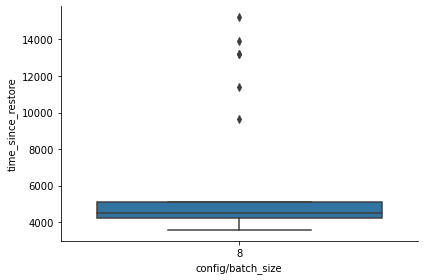

In [12]:
fig, ax = plt.subplots()

sns.boxplot(data=df, x='config/batch_size', y='time_since_restore', color=sns.color_palette()[0])

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

fig.tight_layout()
fig.savefig(f'{plot_dir}/time_vs_batch_size')

## Dependence on the parameters

In [13]:
config_columns

['config/activation_function_last_layer',
 'config/activation_functions_inbetween',
 'config/batch_size',
 'config/datafile',
 'config/epochs',
 'config/learning_rate',
 'config/n_blocks',
 'config/n_depth',
 'config/n_width',
 'config/nominal_dimension',
 'config/optimizer',
 'config/preprocessor_x',
 'config/preprocessor_y',
 'config/weight_artificial',
 'config/weight_reconstruction',
 'config/weight_x',
 'config/weight_y',
 'config/weight_z',
 'config/y_noise']

In [14]:
to_plot = df[config_columns + ['r2_val_dvar']].rename(columns=config_column_labels)

<ipython-input-15-4ae40c6ed3e8>:18: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  fig.tight_layout()
<ipython-input-15-4ae40c6ed3e8>:18: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  fig.tight_layout()
<ipython-input-15-4ae40c6ed3e8>:18: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  fig.tight_layout()


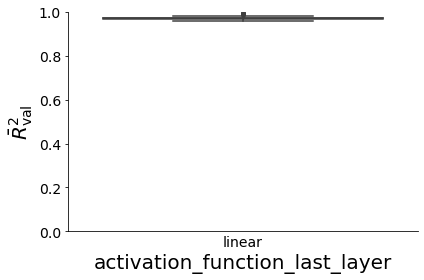

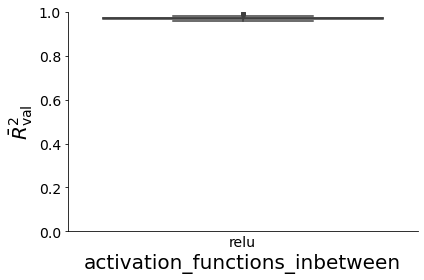

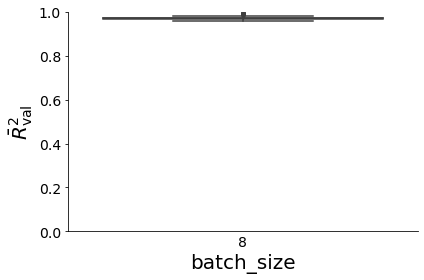

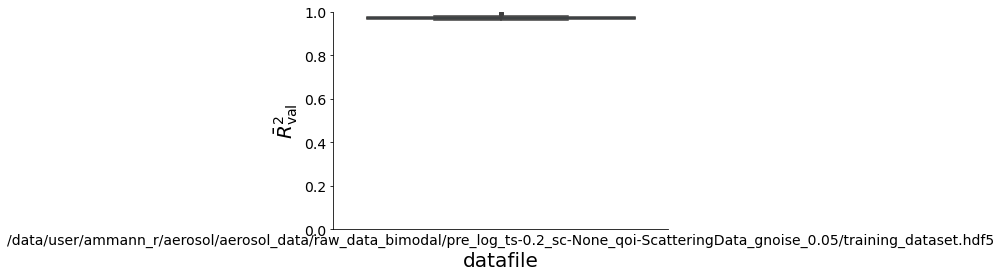

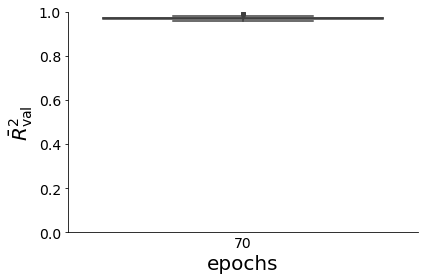

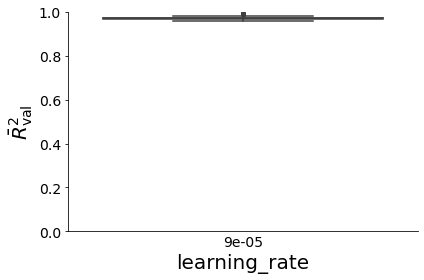

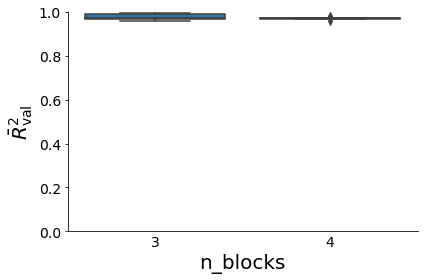

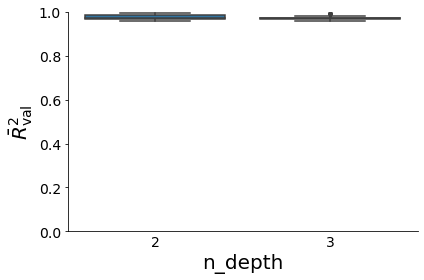

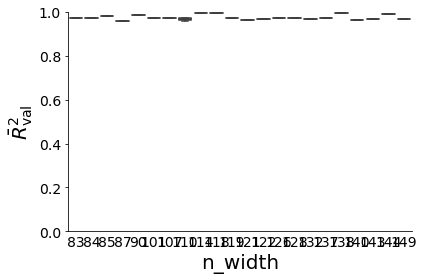

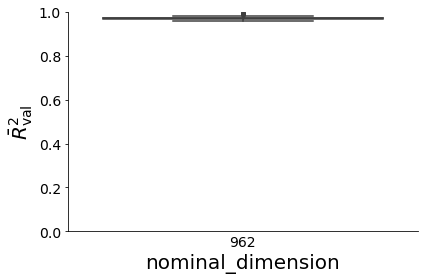

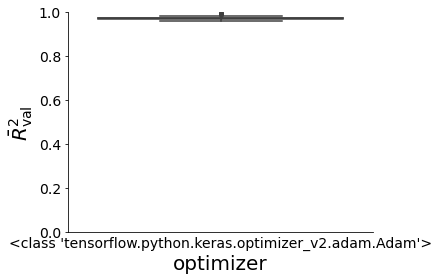

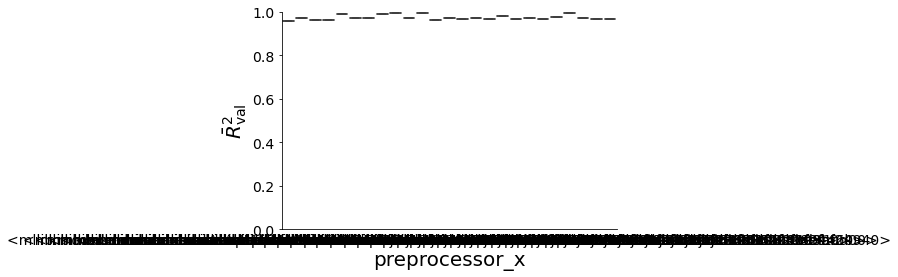

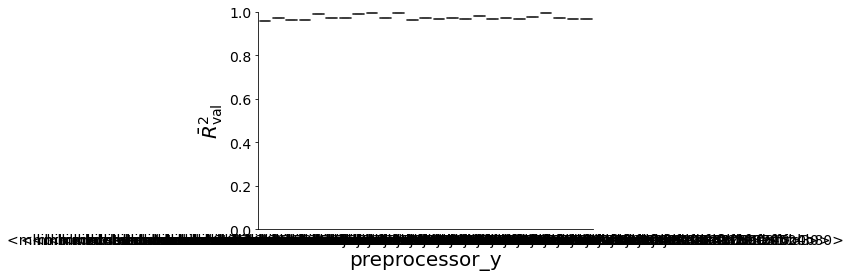

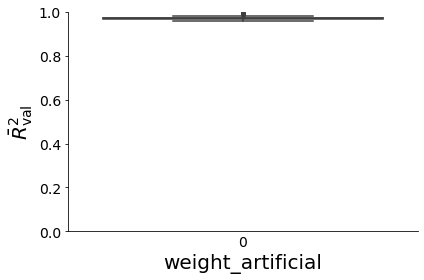

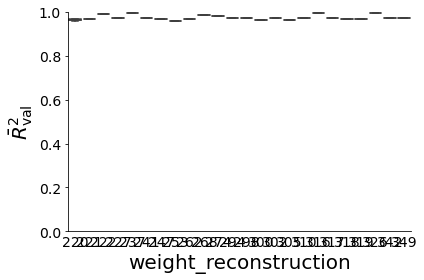

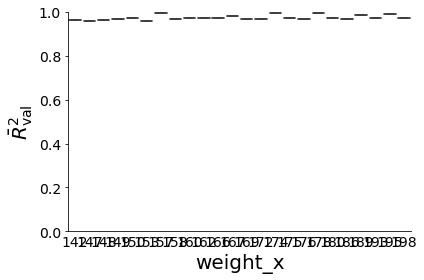

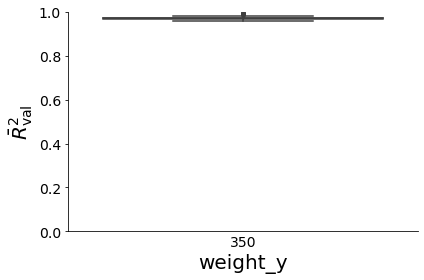

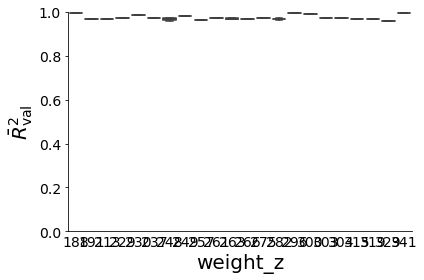

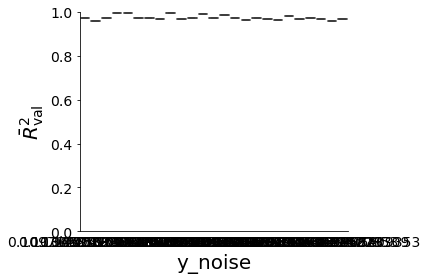

In [15]:
for param in to_plot.columns:
    if param == 'r2_val_dvar':
        continue

    fig, ax = plt.subplots()

    sns.boxplot(data=to_plot, x=param, y='r2_val_dvar', color=sns.color_palette()[0])

    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.set_ylim([0., 1.])
    ax.set_xlabel(ax.get_xlabel(), fontsize=20)
    ax.set_ylabel(r'$\bar{R}^2_\mathrm{val}$', fontsize=20)
    ax.tick_params(labelsize=14)
    ax.tick_params(axis='x', length=0)
    #ax.grid(True, axis='y')
    
    fig.tight_layout()
    fig.savefig(f'{plot_dir}/dependence_on_{param}.jpg')

# Best configs

In [16]:
df['config/datafile'][0]

'/data/user/ammann_r/aerosol/aerosol_data/raw_data_bimodal/pre_log_ts-0.2_sc-None_qoi-ScatteringData_gnoise_0.05/training_dataset.hdf5'

In [17]:
df.keys()

Index(['MAE_train', 'MAE_val', 'MAPE_train', 'MAPE_val', 'MSE_train',
       'MSE_val', 'median_percentile_max_error_train',
       'median_percentile_max_error_val', '90_percentile_max_error_train',
       '90_percentile_max_error_val', 'r2_train', 'r2_val', 'r2_adj_train',
       'r2_adj_val', 'MAE_train_dvar', 'MAE_val_dvar', 'MAPE_train_dvar',
       'MAPE_val_dvar', 'MSE_train_dvar', 'MSE_val_dvar',
       'median_percentile_max_error_train_dvar',
       'median_percentile_max_error_val_dvar',
       '90_percentile_max_error_train_dvar',
       '90_percentile_max_error_val_dvar', 'r2_train_dvar', 'r2_val_dvar',
       'r2_adj_train_dvar', 'r2_adj_val_dvar', 'time_this_iter_s', 'done',
       'timesteps_total', 'episodes_total', 'training_iteration',
       'experiment_id', 'date', 'timestamp', 'time_total_s', 'pid', 'hostname',
       'node_ip', 'time_since_restore', 'timesteps_since_restore',
       'iterations_since_restore', 'trial_id',
       'config/activation_function_last_l

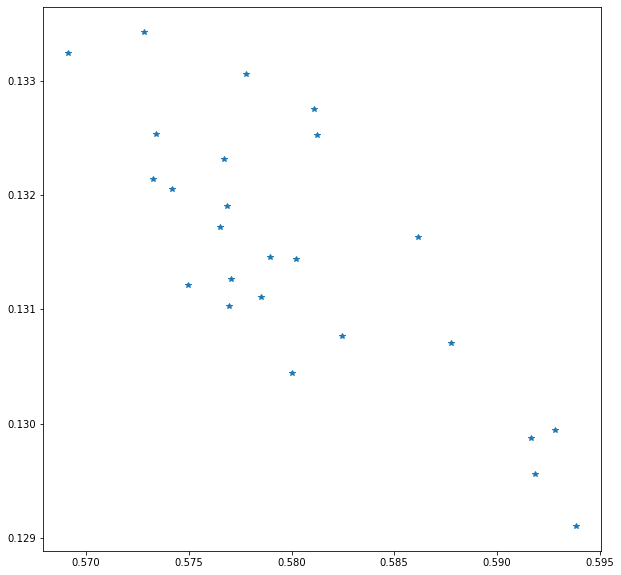

In [18]:
plt.figure(figsize = (10,10))
plt.plot(df['r2_val'],df['MAE_val'],'*')


In [19]:
best_config = df.sort_values('r2_val_dvar', ascending=False).iloc[1, :]


In [20]:
df.sort_values('r2_val', ascending=False)[config_columns + ['r2_val_dvar','r2_val' ,'MAE_val', 'median_percentile_max_error_val', '90_percentile_max_error_val']].rename(columns=config_column_labels).head(3)

activation_function_last_layer activation_functions_inbetween  batch_size  \
11                         linear                           relu           8   
12                         linear                           relu           8   
0                          linear                           relu           8   

                                             datafile  epochs  learning_rate  \
11  /data/user/ammann_r/aerosol/aerosol_data/raw_d...      70        0.00009   
12  /data/user/ammann_r/aerosol/aerosol_data/raw_d...      70        0.00009   
0   /data/user/ammann_r/aerosol/aerosol_data/raw_d...      70        0.00009   

    n_blocks  n_depth  n_width  nominal_dimension  ... weight_reconstruction  \
11         3        3      121                962  ...                   305   
12         4        3      128                962  ...                   227   
0          4        2       87                962  ...                   253   

   weight_x weight_y  weight_z   y_noise  r2_val_dvar    r2_val   MAE_val  \
11      142      350       282  0.223465     0.963517  0.593830  0.129106   
12      166      350       282  0.150931     0.971124  0.592811  0.129949   
0       153      350       329  0.113058     0.959971  0.591837  0.129558   

    median_percentile_max_error_val  90_percentile_max_error_val  
11                      2517.744903                 17835.862150  
12                      2486.317062                 17786.317173  
0                       2477.700782                 17898.647117  

[3 rows x 24 columns]

In [21]:
df.sort_values('r2_val_dvar', ascending=False)[config_columns + ['r2_val_dvar','r2_val' ,'MAE_val', 'median_percentile_max_error_val', '90_percentile_max_error_val']].rename(columns=config_column_labels).head(20)

activation_function_last_layer activation_functions_inbetween  batch_size  \
10                         linear                           relu           8   
8                          linear                           relu           8   
21                         linear                           relu           8   
4                          linear                           relu           8   
7                          linear                           relu           8   
16                         linear                           relu           8   
20                         linear                           relu           8   
6                          linear                           relu           8   
9                          linear                           relu           8   
12                         linear                           relu           8   
18                         linear                           relu           8   
1                          linear                           relu           8   
22                         linear                           relu           8   
14                         linear                           relu           8   
5                          linear                           relu           8   
15                         linear                           relu           8   
19                         linear                           relu           8   
17                         linear                           relu           8   
24                         linear                           relu           8   
13                         linear                           relu           8   

                                             datafile  epochs  learning_rate  \
10  /data/user/ammann_r/aerosol/aerosol_data/raw_d...      70        0.00009   
8   /data/user/ammann_r/aerosol/aerosol_data/raw_d...      70        0.00009   
21  /data/user/ammann_r/aerosol/aerosol_data/raw_d...      70        0.00009   
4   /data/user/ammann_r/aerosol/aerosol_data/raw_d...      70        0.00009   
7   /data/user/ammann_r/aerosol/aerosol_data/raw_d...      70        0.00009   
16  /data/user/ammann_r/aerosol/aerosol_data/raw_d...      70        0.00009   
20  /data/user/ammann_r/aerosol/aerosol_data/raw_d...      70        0.00009   
6   /data/user/ammann_r/aerosol/aerosol_data/raw_d...      70        0.00009   
9   /data/user/ammann_r/aerosol/aerosol_data/raw_d...      70        0.00009   
12  /data/user/ammann_r/aerosol/aerosol_data/raw_d...      70        0.00009   
18  /data/user/ammann_r/aerosol/aerosol_data/raw_d...      70        0.00009   
1   /data/user/ammann_r/aerosol/aerosol_data/raw_d...      70        0.00009   
22  /data/user/ammann_r/aerosol/aerosol_data/raw_d...      70        0.00009   
14  /data/user/ammann_r/aerosol/aerosol_data/raw_d...      70        0.00009   
5   /data/user/ammann_r/aerosol/aerosol_data/raw_d...      70        0.00009   
15  /data/user/ammann_r/aerosol/aerosol_data/raw_d...      70        0.00009   
19  /data/user/ammann_r/aerosol/aerosol_data/raw_d...      70        0.00009   
17  /data/user/ammann_r/aerosol/aerosol_data/raw_d...      70        0.00009   
24  /data/user/ammann_r/aerosol/aerosol_data/raw_d...      70        0.00009   
13  /data/user/ammann_r/aerosol/aerosol_data/raw_d...      70        0.00009   

    n_blocks  n_depth  n_width  nominal_dimension  ... weight_reconstruction  \
10         3        2      114                962  ...                   237   
8          3        2      138                962  ...                   316   
21         3        3      118                962  ...                   326   
4          3        3      144                962  ...                   222   
7          3        2       90                962  ...                   268   
16         4        3       85                962  ...                   274   
20         3        3      126                962  ...                   317   
6

In [22]:
best_config

MAE_train                                                   0.128542
MAE_val                                                     0.131027
MAPE_train                                                 31.924458
MAPE_val                                                   31.525721
MSE_train                                                   0.037945
                                         ...                        
config/weight_x                                                  178
config/weight_y                                                  350
config/weight_z                                                  341
config/y_noise                                              0.145947
logdir             /data/user/ammann_r/aerosol/aerosol_results/bi...
Name: 8, Length: 64, dtype: object

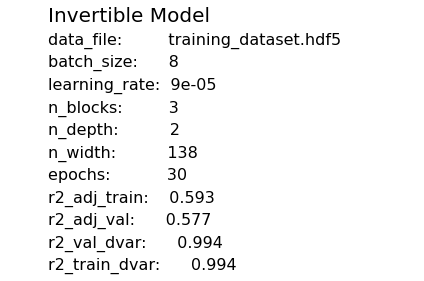

In [23]:
fig, ax = plt.subplots()

ax.annotate(xy=(1, 1),xytext=(0.1, 1),text='Invertible Model',fontsize=20)
ax.annotate(xy=(1, 1),xytext=(0.1, 0.9),text='data_file:         ' +os.path.basename(best_config['config/datafile']),fontsize=16)
ax.annotate(xy=(1, 1),xytext=(0.1, 0.8),text='batch_size:      ' +str(best_config['config/batch_size']),fontsize=16)
ax.annotate(xy=(1, 1),xytext=(0.1, 0.7),text='learning_rate:  '+str(best_config['config/learning_rate']),fontsize=16)
ax.annotate(xy=(1, 1),xytext=(0.1, 0.6),text='n_blocks:         '+str(best_config['config/n_blocks']),fontsize=16)
ax.annotate(xy=(1, 1),xytext=(0.1, 0.5),text='n_depth:          '+str(best_config['config/n_depth']),fontsize=16)
ax.annotate(xy=(1, 1),xytext=(0.1, 0.4),text='n_width:          '+str(best_config['config/n_width']),fontsize=16)
ax.annotate(xy=(1, 1),xytext=(0.1, 0.3),text='epochs:           '+str(best_config['iterations_since_restore']),fontsize=16)
ax.annotate(xy=(1, 1),xytext=(0.1, 0.2),text='r2_adj_train:    '+str(np.round(best_config['r2_adj_train'],3)),fontsize=16)
ax.annotate(xy=(1, 1),xytext=(0.1, 0.1),text='r2_adj_val:      '+str(np.round(best_config['r2_adj_val'],3)),fontsize=16)
ax.annotate(xy=(1, 1),xytext=(0.1, 0.0),text='r2_val_dvar:      '+str(np.round(best_config['r2_val_dvar'],3)),fontsize=16)
ax.annotate(xy=(1, 1),xytext=(0.1, -0.1),text='r2_train_dvar:      '+str(np.round(best_config['r2_train_dvar'],3)),fontsize=16)


ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)

fig.tight_layout()
fig.savefig(f'{plot_dir}/invertible_model_description.jpg',bbox_inches='tight')

In [24]:
print('Invertible Model')
print('data_file:',os.path.basename(best_config['config/datafile']))
print('batch_size:',best_config['config/batch_size'])
print('learning_rate:',best_config['config/learning_rate'])
print('n_blocks:',best_config['config/n_blocks'])
print('n_depth:',best_config['config/n_depth'])
print('n_width:',best_config['config/n_width'])
print('epochs:',best_config['iterations_since_restore'])
print('r2_adj_train:',np.round(best_config['r2_adj_train'],3))
print('r2_adj_val:',np.round(best_config['r2_adj_val'],3))


Invertible Model
data_file: training_dataset.hdf5
batch_size: 8
learning_rate: 9e-05
n_blocks: 3
n_depth: 2
n_width: 138
epochs: 30
r2_adj_train: 0.593
r2_adj_val: 0.577


# Worst configs

In [25]:
df.sort_values('r2_val', ascending=True)[config_columns + ['r2_val_dvar','r2_adj_val', 'MAPE_val', 'median_percentile_max_error_val', '90_percentile_max_error_val']].rename(columns=config_column_labels).head(5)

activation_function_last_layer activation_functions_inbetween  batch_size  \
19                         linear                           relu           8   
20                         linear                           relu           8   
4                          linear                           relu           8   
24                         linear                           relu           8   
14                         linear                           relu           8   

                                             datafile  epochs  learning_rate  \
19  /data/user/ammann_r/aerosol/aerosol_data/raw_d...      70        0.00009   
20  /data/user/ammann_r/aerosol/aerosol_data/raw_d...      70        0.00009   
4   /data/user/ammann_r/aerosol/aerosol_data/raw_d...      70        0.00009   
24  /data/user/ammann_r/aerosol/aerosol_data/raw_d...      70        0.00009   
14  /data/user/ammann_r/aerosol/aerosol_data/raw_d...      70        0.00009   

    n_blocks  n_depth  n_width  nominal_dimension  ... weight_reconstruction  \
19         4        3      122                962  ...                   220   
20         3        3      126                962  ...                   317   
4          3        3      144                962  ...                   222   
24         4        3      143                962  ...                   221   
14         4        3       83                962  ...                   241   

   weight_x weight_y  weight_z   y_noise  r2_val_dvar  r2_adj_val   MAPE_val  \
19      169      350       266  0.176623     0.969027    0.568781  32.305597   
20      193      350       248  0.136916     0.974164    0.572474  32.915649   
4       195      350       300  0.197884     0.990010    0.572930  31.773061   
24      176      350       315  0.270017     0.967961    0.573053  31.861619   
14      150      350       304  0.203037     0.970321    0.573831  32.231629   

    median_percentile_max_error_val  90_percentile_max_error_val  
19                      2517.539754                 18044.169329  
20                      2561.320026                 17868.462510  
4                       2491.552905                 18236.725293  
24                      2539.394716                 18303.150745  
14                      2541.547422                 17999.240311  

[5 rows x 24 columns]

In [26]:
df

MAE_train   MAE_val  MAPE_train   MAPE_val  MSE_train   MSE_val  \
0    0.129649  0.129558   32.129601  32.281938   0.038264  0.038273   
1    0.132833  0.132752   32.069754  32.260169   0.040238  0.040285   
2    0.131600  0.131629   31.887442  31.709192   0.039460  0.039527   
3    0.131642  0.131721   32.498184  31.887110   0.039396  0.039529   
4    0.130589  0.132138   32.085919  31.773061   0.039064  0.040055   
5    0.131378  0.131439   32.473115  31.580205   0.039422  0.039528   
6    0.132165  0.132310   32.560461  31.984592   0.039978  0.040118   
7    0.130159  0.130769   32.581239  32.032241   0.038794  0.039200   
8    0.128542  0.131027   31.924458  31.525721   0.037945  0.039473   
9    0.131503  0.131460   33.728863  32.776377   0.039301  0.039331   
10   0.128540  0.130448   32.608450  31.864357   0.038014  0.039215   
11   0.129059  0.129106   32.406799  31.657124   0.037866  0.037939   
12   0.129711  0.129949   32.227313  31.481894   0.038376  0.038584   
13   0.130432  0.130710   32.459872  32.713193   0.038711  0.038972   
14   0.131993  0.132057   32.598434  32.231629   0.039909  0.040048   
15   0.132531  0.132520   32.860888  31.890943   0.040122  0.040220   
16   0.129783  0.131107   31.556004  31.196791   0.038684  0.039505   
17   0.131231  0.131263   32.694816  32.504059   0.039225  0.039305   
18   0.129745  0.129875   32.488333  33.262219   0.038422  0.038569   
19   0.133121  0.133239   32.779519  32.305597   0.040321  0.040504   
20   0.133385  0.133425   32.993397  32.915649   0.040794  0.040888   
21   0.128135  0.131212   32.432178  31.180975   0.037879  0.039755   
22   0.131666  0.131900   32.595819  31.622674   0.039607  0.039818   
23   0.132857  0.133056   32.540354  32.599848   0.040215  0.040402   
24   0.132450  0.132531   32.898883  31.861619   0.040072  0.040198   

    median_percentile_max_error_train  median_percentile_max_error_val  \
0                         2512.217289                      2477.700782   
1                         2521.512289                      2492.286839   
2                         2495.460750                      2457.736177   
3                         2553.144565                      2498.547442   
4                         2496.908634                      2491.552905   
5                         2548.473074                      2529.557418   
6                         2521.294041                      2468.524871   
7                         2528.069755                      2525.621799   
8                         2459.948196                      2456.569237   
9                         2636.075137                      2590.465952   
10                        2504.079690                      2492.275871   
11                        2543.477401                      2517.744903   
12                        2510.394776                      2486.317062   
13                        2574.663528                      2505.364737   
14                        2556.407872                      2541.547422   
15                        2518.725644                      2486.036805   
16                        2442.528137                      2423.508409   
17                        2546.861523                      2543.256642   
18                        2549.328845                      2497.760505   
19                        2563.071601                      2517.539754   
20                        2598.226909                      2561.320026   
21                        2476.687411                      2477.036226   
22                        2541.793021                      2472.385648   
23                        2567.135420                      2538.729592   
24                        2538.265812                      2539.394716   

    90_percentile_max_error_train  90_percentile_max_error_val  ...  \
0                    17320.719988                 17898.647117  ...   
1                    17397.993037                 17434.963899  ...   
2                  

# Copy the best model to the models directory

In [27]:
best_config

MAE_train                                                   0.128542
MAE_val                                                     0.131027
MAPE_train                                                 31.924458
MAPE_val                                                   31.525721
MSE_train                                                   0.037945
                                         ...                        
config/weight_x                                                  178
config/weight_y                                                  350
config/weight_z                                                  341
config/y_noise                                              0.145947
logdir             /data/user/ammann_r/aerosol/aerosol_results/bi...
Name: 8, Length: 64, dtype: object

In [28]:
best_config["config/preprocessor_y"]

'<mllib.model.standardscaler.StandardScaler object at 0x2b208bf08d90>'

In [29]:
best_config["config/preprocessor_x"]

'<mllib.model.minmaxscaler.AdaptiveMinMaxScaler object at 0x2b208bf08c40>'

In [30]:
best_model_dir = f'{best_config["logdir"]}/surrogate_model'

In [31]:
#best_model_dir = '/data/project/general/aerosolretriev/aerosol_results_rb/simulated_data/preprocessed_by_hand/log_P11/mmscaled_asha_2/ASHA_invertible_id/train_invertible_model_c6982_00011_11_batch_size=8,weight_reconstruction=29,weight_x=37,weight_y=89,weight_z=65_2021-04-28_12-37-48/surrogate_model'


In [32]:
model_dir = model_dir + '_alter'

In [33]:
model_dir

'/data/user/ammann_r/aerosol/aerosol_results/bimodal_dataset/inv_gnoise_0.05/models_alter'

In [34]:
shutil.copytree(best_model_dir, f'{model_dir}/invertible_model')

'/data/user/ammann_r/aerosol/aerosol_results/bimodal_dataset/inv_gnoise_0.05/models_alter/invertible_model'

# Load history of best config

In [35]:
best_config.name

8

In [36]:
best_model_folder = best_config['trial_id']

In [37]:
best_config

MAE_train                                                   0.128542
MAE_val                                                     0.131027
MAPE_train                                                 31.924458
MAPE_val                                                   31.525721
MSE_train                                                   0.037945
                                         ...                        
config/weight_x                                                  178
config/weight_y                                                  350
config/weight_z                                                  341
config/y_noise                                              0.145947
logdir             /data/user/ammann_r/aerosol/aerosol_results/bi...
Name: 8, Length: 64, dtype: object

In [38]:
result_dir

'/data/user/ammann_r/aerosol/aerosol_results/bimodal_dataset/inv_gnoise_0.05'

In [39]:
best_model_hist = pd.read_csv(f'{result_dir}/histories/{best_model_folder}.csv', index_col=0)

In [40]:
best_model_hist.keys()

Index(['MAE_train', 'MAE_val', 'MAPE_train', 'MAPE_val', 'MSE_train',
       'MSE_val', 'median_percentile_max_error_train',
       'median_percentile_max_error_val', '90_percentile_max_error_train',
       '90_percentile_max_error_val', 'r2_train', 'r2_val', 'r2_adj_train',
       'r2_adj_val', 'MAE_train_dvar', 'MAE_val_dvar', 'MAPE_train_dvar',
       'MAPE_val_dvar', 'MSE_train_dvar', 'MSE_val_dvar',
       'median_percentile_max_error_train_dvar',
       'median_percentile_max_error_val_dvar',
       '90_percentile_max_error_train_dvar',
       '90_percentile_max_error_val_dvar', 'r2_train_dvar', 'r2_val_dvar',
       'r2_adj_train_dvar', 'r2_adj_val_dvar', 'time_this_iter_s', 'done',
       'timesteps_total', 'episodes_total', 'training_iteration',
       'experiment_id', 'date', 'timestamp', 'time_total_s', 'pid', 'hostname',
       'node_ip', 'time_since_restore', 'timesteps_since_restore',
       'iterations_since_restore', 'trial_id'],
      dtype='object')

# Save configurations of best model

In [41]:
best_config_df = pd.DataFrame(best_config)

In [42]:
best_config_df = best_config_df.T
best_config_df

MAE_train   MAE_val MAPE_train   MAPE_val MSE_train   MSE_val  \
8  0.128542  0.131027  31.924458  31.525721  0.037945  0.039473   

  median_percentile_max_error_train median_percentile_max_error_val  \
8                       2459.948196                     2456.569237   

  90_percentile_max_error_train 90_percentile_max_error_val  ...  \
8                  17183.322308                18023.856826  ...   

                                    config/optimizer  \
8  <class 'tensorflow.python.keras.optimizer_v2.a...   

                               config/preprocessor_x  \
8  <mllib.model.minmaxscaler.AdaptiveMinMaxScaler...   

                               config/preprocessor_y config/weight_artificial  \
8  <mllib.model.standardscaler.StandardScaler obj...                        0   

  config/weight_reconstruction config/weight_x config/weight_y  \
8                          316             178             350   

  config/weight_z config/y_noise  \
8             341       0.145947   

                                              logdir  
8  /data/user/ammann_r/aerosol/aerosol_results/bi...  

[1 rows x 64 columns]

In [43]:
best_config_df.columns

Index(['MAE_train', 'MAE_val', 'MAPE_train', 'MAPE_val', 'MSE_train',
       'MSE_val', 'median_percentile_max_error_train',
       'median_percentile_max_error_val', '90_percentile_max_error_train',
       '90_percentile_max_error_val', 'r2_train', 'r2_val', 'r2_adj_train',
       'r2_adj_val', 'MAE_train_dvar', 'MAE_val_dvar', 'MAPE_train_dvar',
       'MAPE_val_dvar', 'MSE_train_dvar', 'MSE_val_dvar',
       'median_percentile_max_error_train_dvar',
       'median_percentile_max_error_val_dvar',
       '90_percentile_max_error_train_dvar',
       '90_percentile_max_error_val_dvar', 'r2_train_dvar', 'r2_val_dvar',
       'r2_adj_train_dvar', 'r2_adj_val_dvar', 'time_this_iter_s', 'done',
       'timesteps_total', 'episodes_total', 'training_iteration',
       'experiment_id', 'date', 'timestamp', 'time_total_s', 'pid', 'hostname',
       'node_ip', 'time_since_restore', 'timesteps_since_restore',
       'iterations_since_restore', 'trial_id',
       'config/activation_function_last_l

In [44]:
best_config_df.to_csv(f'{model_dir}/configs.csv')

# Plot the history

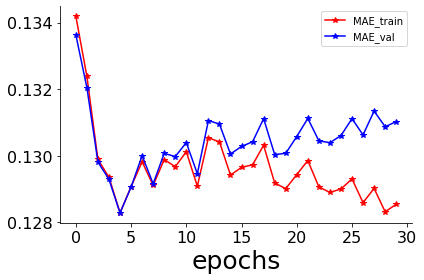

In [45]:
fig, ax = plt.subplots()

ax.plot(best_model_hist['MAE_train'],'r*-', label = 'MAE_train')
ax.plot(best_model_hist['MAE_val'],'b*-',label =  'MAE_val')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlabel('epochs', fontsize=25)
ax.tick_params(labelsize=16)
ax.legend()
fig.tight_layout()


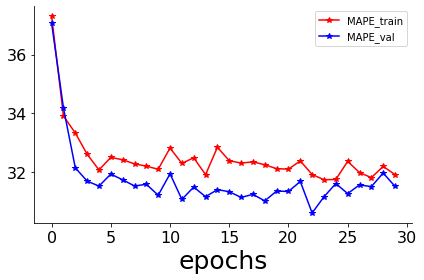

In [46]:
fig, ax = plt.subplots()

ax.plot(best_model_hist['MAPE_train'],'r*-', label = 'MAPE_train')
ax.plot(best_model_hist['MAPE_val'],'b*-',label =  'MAPE_val')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlabel('epochs', fontsize=25)
ax.tick_params(labelsize=16)
ax.legend()
fig.tight_layout()

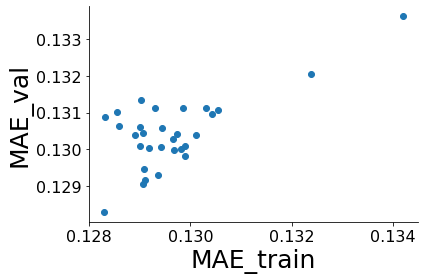

In [47]:
fig, ax = plt.subplots()


ax.scatter(best_model_hist['MAE_train'],best_model_hist['MAE_val'])

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlabel('MAE_train', fontsize=25)
ax.set_ylabel('MAE_val', fontsize=25)

ax.tick_params(labelsize=16)
fig.tight_layout()
fig.savefig(f'{plot_dir}/R2_generalisation.jpg')

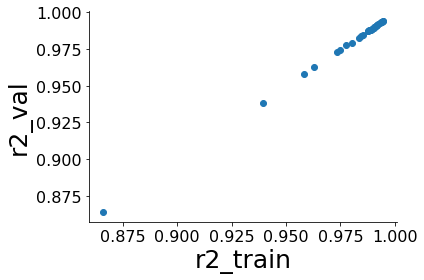

In [48]:
fig, ax = plt.subplots()


ax.scatter(best_model_hist['r2_train_dvar'],best_model_hist['r2_val_dvar'])

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlabel('r2_train', fontsize=25)
ax.set_ylabel('r2_val', fontsize=25)

ax.tick_params(labelsize=16)
fig.tight_layout()
fig.savefig(f'{plot_dir}/R2_generalisation.jpg')

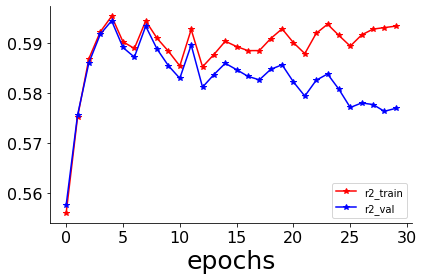

In [49]:
fig, ax = plt.subplots()

ax.plot(best_model_hist['r2_train'],'r*-', label = 'r2_train')
ax.plot(best_model_hist['r2_val'],'b*-',label =  'r2_val')

#ax.set_xscale('log')
#ax.set_yscale('log')

#ax.set_ylim([0.97,1])
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlabel('epochs', fontsize=25)
ax.tick_params(labelsize=16)
ax.legend()
fig.tight_layout()

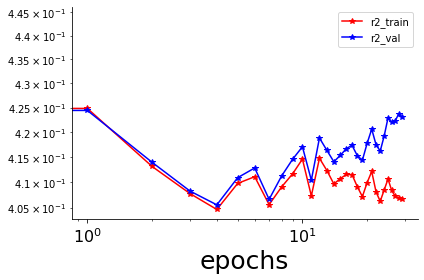

In [50]:
fig, ax = plt.subplots()

ax.plot(1-best_model_hist['r2_train'],'r*-', label = 'r2_train')
ax.plot(1-best_model_hist['r2_val'],'b*-',label =  'r2_val')

ax.set_xscale('log')
ax.set_yscale('log')

#ax.set_ylim([0.97,1])
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlabel('epochs', fontsize=25)
ax.tick_params(labelsize=16)
ax.legend()
fig.tight_layout()

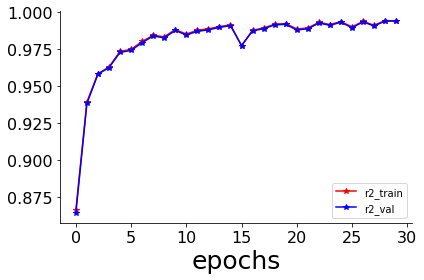

In [51]:
fig, ax = plt.subplots()

ax.plot(best_model_hist['r2_train_dvar'],'r*-', label = 'r2_train')
ax.plot(best_model_hist['r2_val_dvar'],'b*-',label =  'r2_val')

#ax.set_xscale('log')
#ax.set_yscale('log')

#ax.set_ylim([0.97,1])
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlabel('epochs', fontsize=25)
ax.tick_params(labelsize=16)
ax.legend()
fig.tight_layout()

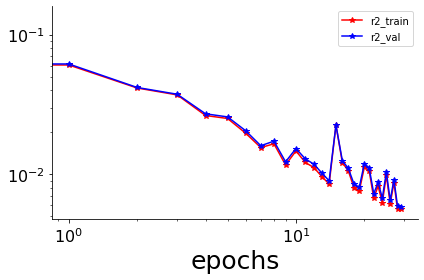

In [52]:
fig, ax = plt.subplots()

ax.plot(1-best_model_hist['r2_train_dvar'],'r*-', label = 'r2_train')
ax.plot(1-best_model_hist['r2_val_dvar'],'b*-',label =  'r2_val')

ax.set_xscale('log')
ax.set_yscale('log')

#ax.set_ylim([0.97,1])
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlabel('epochs', fontsize=25)
ax.tick_params(labelsize=16)
ax.legend()
fig.tight_layout()

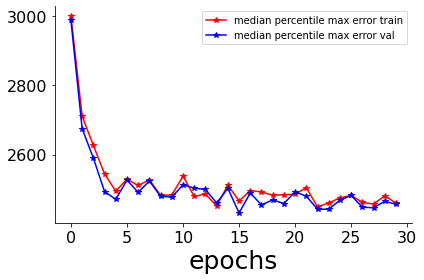

In [53]:
fig, ax = plt.subplots()

ax.plot(best_model_hist['median_percentile_max_error_train'],'r*-', label = 'median percentile max error train')
ax.plot(best_model_hist['median_percentile_max_error_val'],'b*-',label =  'median percentile max error val')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlabel('epochs', fontsize=25)
ax.tick_params(labelsize=16)
ax.legend()
fig.tight_layout()


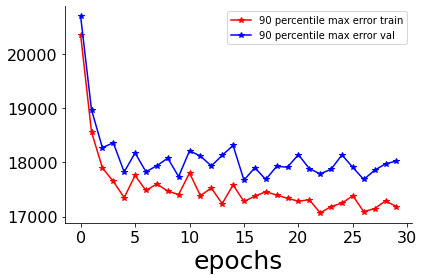

In [54]:
fig, ax = plt.subplots()

ax.plot(best_model_hist['90_percentile_max_error_train'],'r*-', label = '90 percentile max error train')
ax.plot(best_model_hist['90_percentile_max_error_val'],'b*-',label =  '90 percentile max error val')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlabel('epochs', fontsize=25)
ax.tick_params(labelsize=16)
ax.legend()
fig.tight_layout()

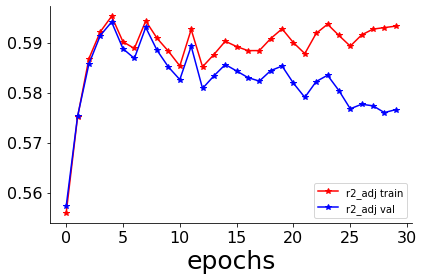

In [55]:
fig, ax = plt.subplots()

ax.plot(best_model_hist['r2_adj_train'],'r*-', label = 'r2_adj train')
ax.plot(best_model_hist['r2_adj_val'],'b*-',label =  'r2_adj val')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlabel('epochs', fontsize=25)
ax.tick_params(labelsize=16)
ax.legend()
fig.tight_layout()

# create overview plot

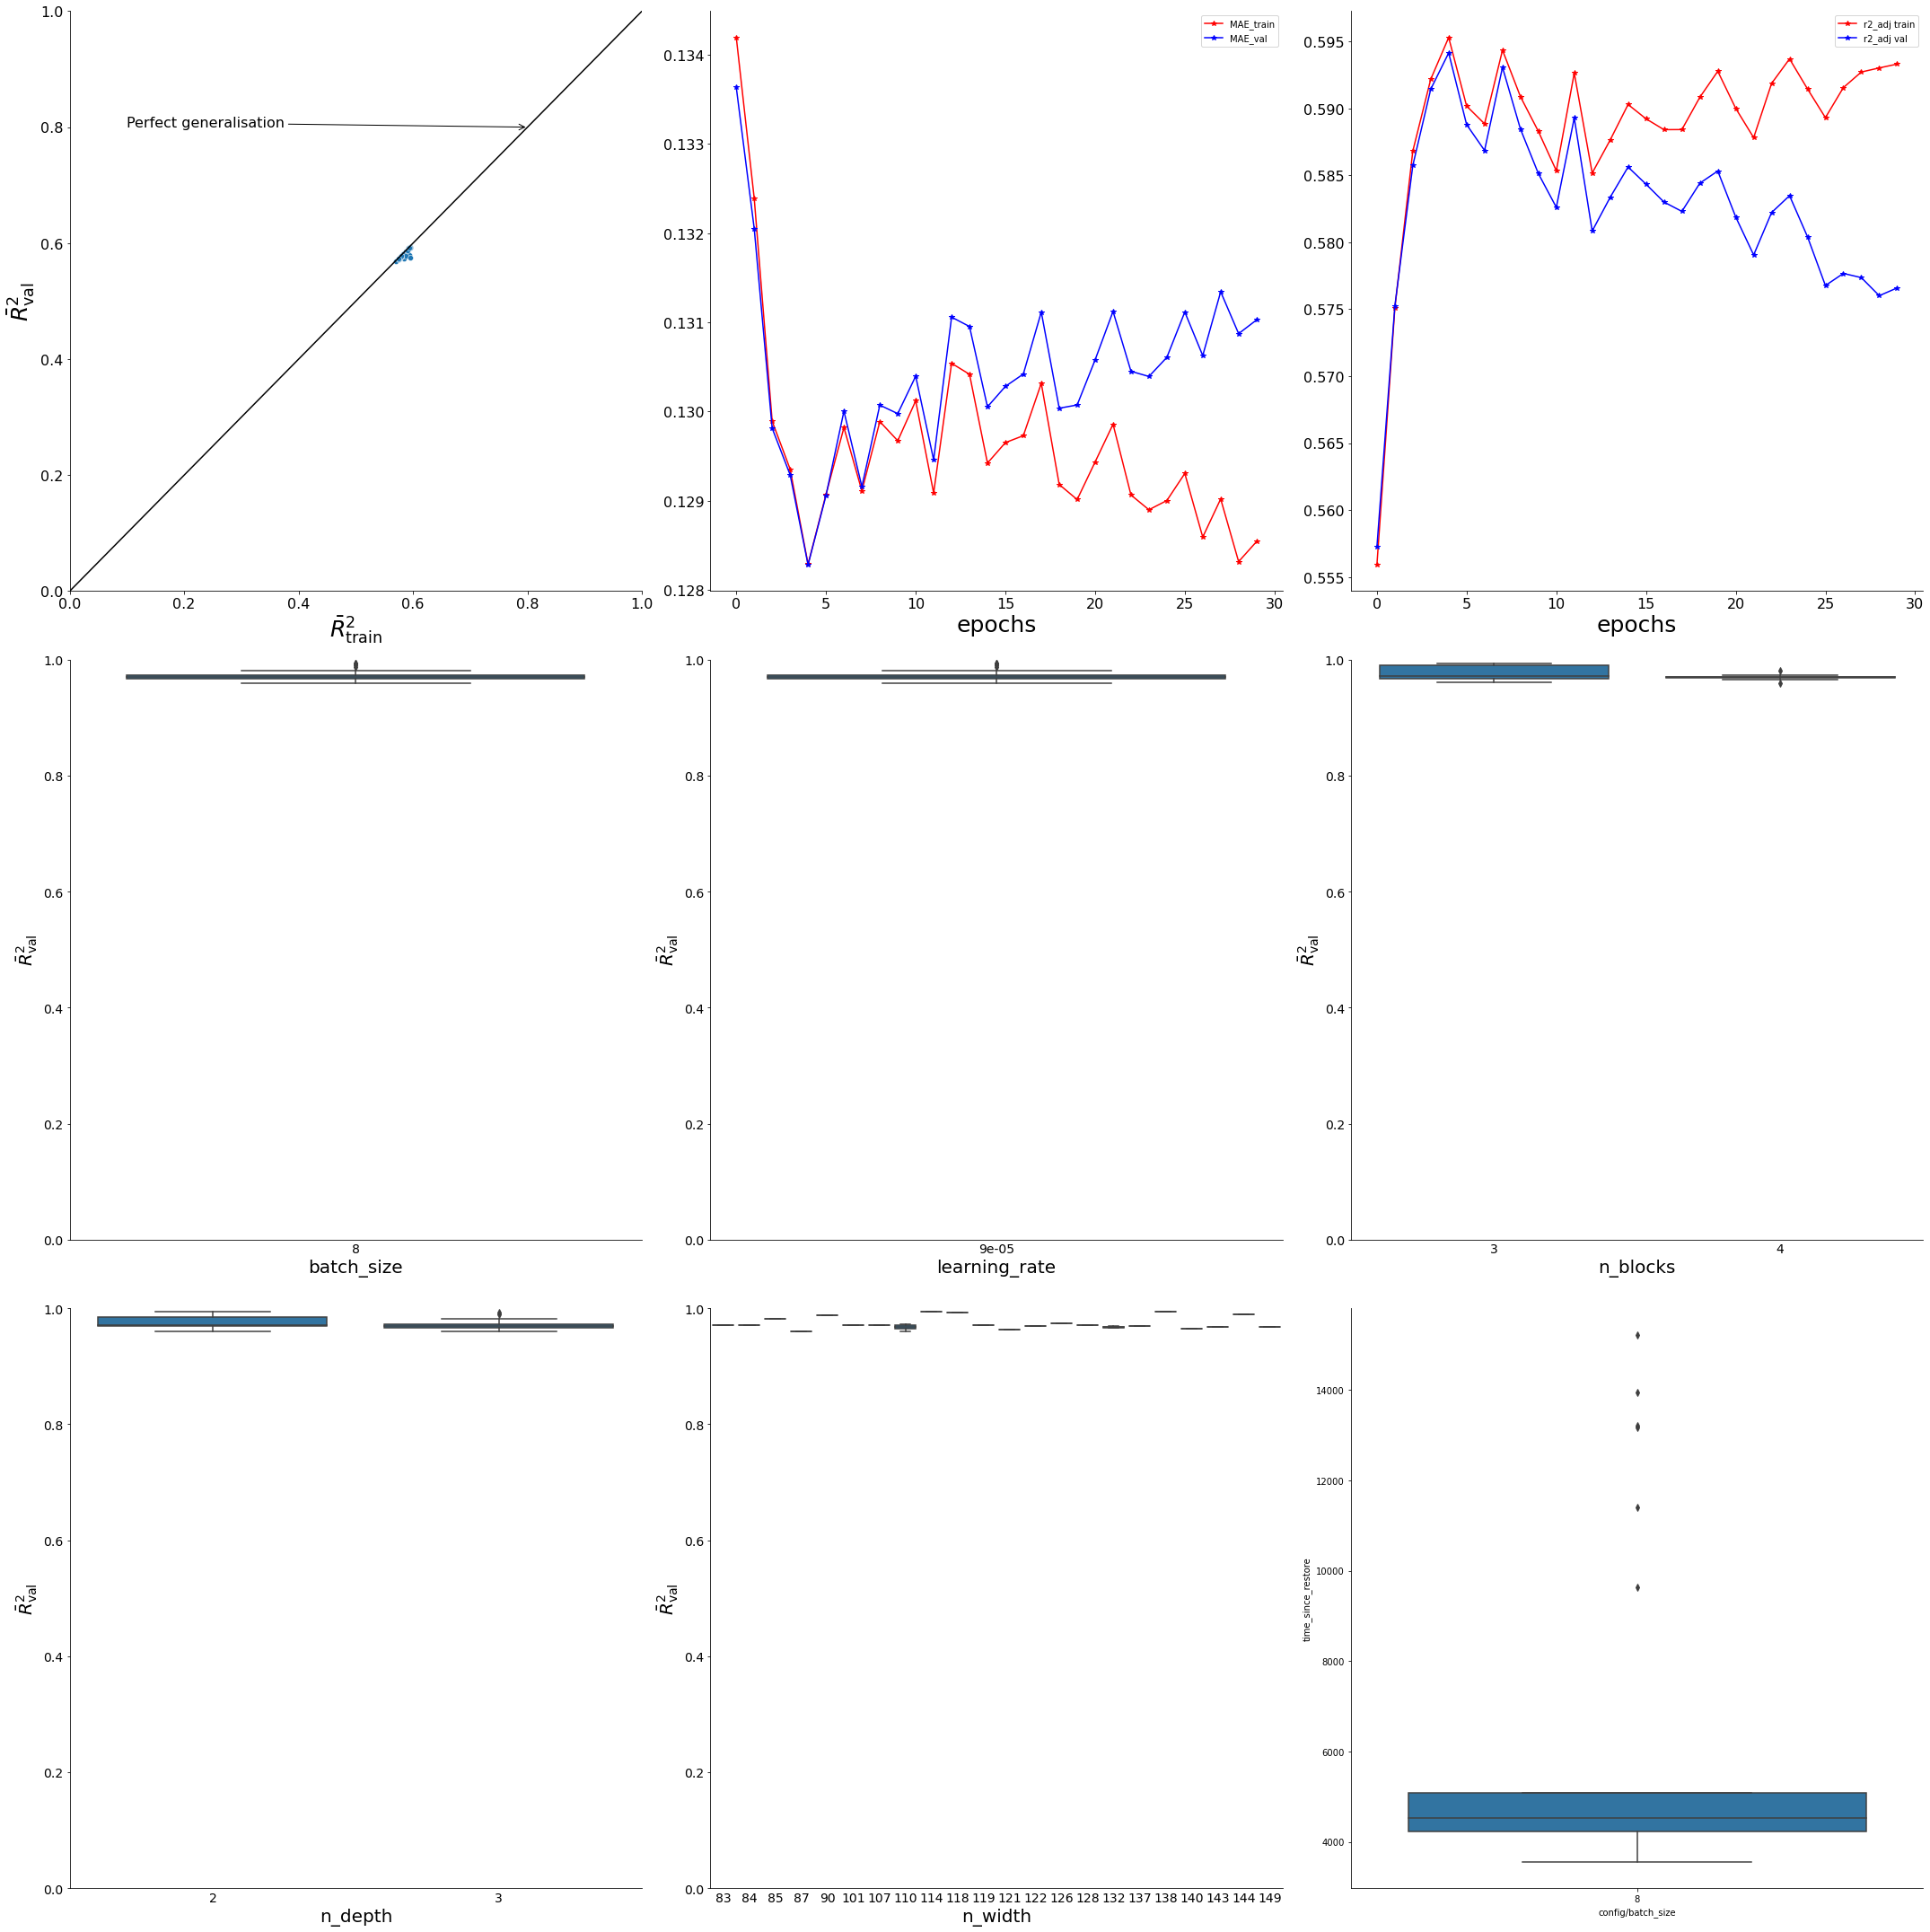

In [56]:
fig, axes = plt.subplots(3, 3, figsize=(30, 30))

ax= axes[0,0]
sns.scatterplot(data=df, x='r2_adj_train', y='r2_adj_val', ax=ax)
ax.plot([-1.5, 1.], [-1.5, 1.], color='black')
ax.annotate(xy=(0.8, 0.8),
            xytext=(0.1, 0.8),
            text='Perfect generalisation',
            fontsize=16,
            arrowprops={
                'arrowstyle': '->'
            })
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlabel(r'$\bar{R}^2_\mathrm{train}$', fontsize=25)
ax.set_ylabel(r'$\bar{R}^2_\mathrm{val}$', fontsize=25)
ax.tick_params(labelsize=16)
ax.set_xlim([0, 1.])
ax.set_ylim([0, 1.])


ax = axes[0,1]
ax.plot(best_model_hist['MAE_train'],'r*-', label = 'MAE_train')
ax.plot(best_model_hist['MAE_val'],'b*-',label =  'MAE_val')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlabel('epochs', fontsize=25)
ax.tick_params(labelsize=16)
ax.legend()

ax = axes[0,2]

ax.plot(best_model_hist['r2_adj_train'],'r*-', label = 'r2_adj train')
ax.plot(best_model_hist['r2_adj_val'],'b*-',label =  'r2_adj val')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlabel('epochs', fontsize=25)
ax.tick_params(labelsize=16)
ax.legend()




axeslist= [[1,0],[1,1],[1,2],[2,0],[2,1]]
i = 0

plot_columns_list = ['batch_size', 'learning_rate', 'n_blocks', 'n_depth','n_width']

for param in plot_columns_list:
    if param == 'r2_adj_val':
        continue
    ax = axes[axeslist[i][0],axeslist[i][1]]
    i = i+1
    sns.boxplot(data=to_plot, x=param, y='r2_val_dvar', color=sns.color_palette()[0],ax=ax)

    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.set_ylim([0., 1.])
    ax.set_xlabel(ax.get_xlabel(), fontsize=20)
    ax.set_ylabel(r'$\bar{R}^2_\mathrm{val}$', fontsize=20)
    ax.tick_params(labelsize=14)
    ax.tick_params(axis='x', length=0)
    #ax.grid(True, axis='y')



ax = axes[2,2]

sns.boxplot(data=df, x='config/batch_size', y='time_since_restore', color=sns.color_palette()[0],ax=ax)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

fig.tight_layout()


fig.savefig(f'{plot_dir}/hyperparameter_scan_overview.jpg',bbox_inches='tight')

In [57]:
plot_dir

'/data/user/ammann_r/aerosol/aerosol_results/bimodal_dataset/inv_gnoise_0.05/plots'

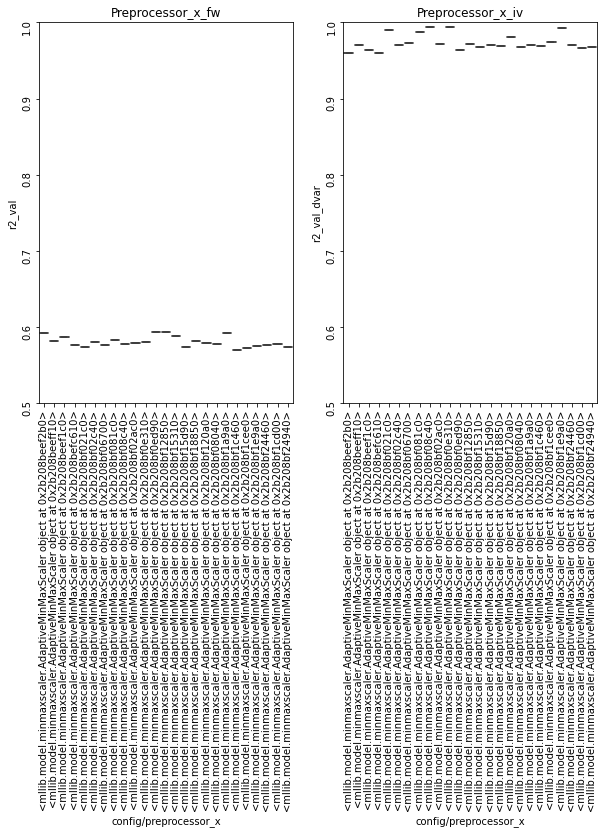

In [58]:
fig, axes = plt.subplots(1, 2, figsize=(10, 7))

ax= axes[0]
sns.boxplot(data=df, x='config/preprocessor_x', y='r2_val', color=sns.color_palette()[0],ax=ax)
ax.tick_params(labelrotation=90)
#plt.xticks(rotation=90)
ax.set_ylim([0.5,1])
ax.set_title('Preprocessor_x_fw')
ax= axes[1]
sns.boxplot(data=df, x='config/preprocessor_x', y='r2_val_dvar', color=sns.color_palette()[0],ax=ax)
ax.tick_params(labelrotation=90)
ax.set_ylim([0.5,1])
ax.set_title('Preprocessor_x_iv')
fig.savefig(f'{plot_dir}/hyperparameter_scan_preprocessor_x.jpg',bbox_inches='tight')

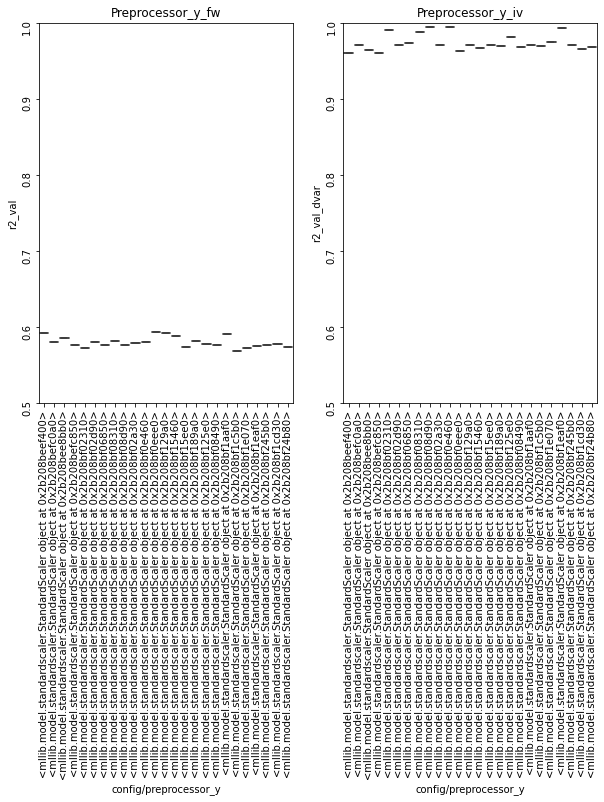

In [59]:
fig, axes = plt.subplots(1, 2, figsize=(10, 7))

ax= axes[0]
sns.boxplot(data=df, x='config/preprocessor_y', y='r2_val', color=sns.color_palette()[0],ax=ax)
ax.tick_params(labelrotation=90)
#plt.xticks(rotation=90)
ax.set_ylim([0.5,1])
ax.set_title('Preprocessor_y_fw')
ax= axes[1]
sns.boxplot(data=df, x='config/preprocessor_y', y='r2_val_dvar', color=sns.color_palette()[0],ax=ax)
ax.tick_params(labelrotation=90)
ax.set_ylim([0.5,1])
ax.set_title('Preprocessor_y_iv')
fig.savefig(f'{plot_dir}/hyperparameter_scan_preprocessor_y.jpg',bbox_inches='tight')